In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('/home/mucahit/PycharmProjects/school/industrialdataworks/HW - 3/mnist_23/mnist_train23.csv')

In [3]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,12089.000000,12089.0,12089.0,12089.0,12089.0,12089.0,12089.0,12089.0,12089.0,12089.0,...,12089.0,12089.0,12089.0,12089.0,12089.0,12089.0,12089.0,12089.0,12089.0,12089.0
mean,2.507155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.499969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.shape

(12089, 785)

In [6]:
test = pd.read_csv('/home/mucahit/PycharmProjects/school/industrialdataworks/HW - 3/mnist_23/mnist_test23.csv')

In [7]:
test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test.shape

(2042, 785)

In [9]:
test.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,2042.000000,2042.0,2042.0,2042.0,2042.0,2042.0,2042.0,2042.0,2042.0,2042.0,...,2042.0,2042.0,2042.0,2042.0,2042.0,2042.0,2042.0,2042.0,2042.0,2042.0
mean,2.494613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.500093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
xtr = df.iloc[:,1:]
ytr = df.iloc[:,0]

xtst = test.iloc[:,1:]
ytst = test.iloc[:,0]

In [11]:
# bg = BaggingClassifier(DecisionTreeClassifier(), 
#                        max_features=1.0, n_estimators=25, 
#                        bootstrap = True)

In [24]:
def BaggingFunc(samples):
    bg = BaggingClassifier(DecisionTreeClassifier(),max_samples=samples, 
                       max_features=1.0, n_estimators=25, 
                       bootstrap = True)
    bg.fit(xtr,ytr) 
    score = round(bg.score(xtst,ytst),4)
    print("{} örnekli test Kümesi için doğruluk : ".format(samples) , round(bg.score(xtst,ytst),4))
    return score

In [25]:
BaggingFunc(50)

50 örnekli test Kümesi için doğruluk :  0.9344


0.9344

In [26]:
BaggingFunc(20)

20 örnekli test Kümesi için doğruluk :  0.8952


0.8952

In [27]:
BaggingFunc(5)

5 örnekli test Kümesi için doğruluk :  0.8477


0.8477

In [28]:
BaggingFunc(10)

10 örnekli test Kümesi için doğruluk :  0.93


0.93

In [38]:
names = ['05 Samples' , '10 Samples', '20 Samples', '50 Samples']
accuracy = [BaggingFunc(5),BaggingFunc(10),BaggingFunc(20),BaggingFunc(50)]

5 örnekli test Kümesi için doğruluk :  0.8888
10 örnekli test Kümesi için doğruluk :  0.9084
20 örnekli test Kümesi için doğruluk :  0.9123
50 örnekli test Kümesi için doğruluk :  0.9403


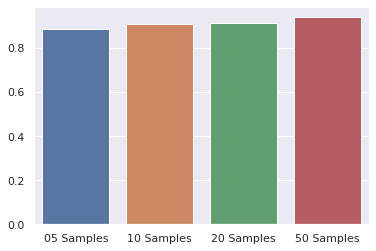

In [39]:
import seaborn as sns
ax = sns.barplot(x= names, y= accuracy)

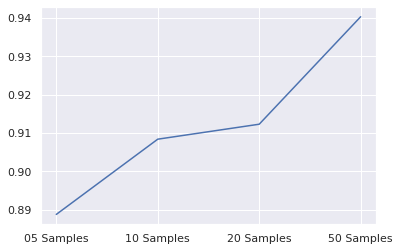

In [40]:
import seaborn as sns
sns.set(style="darkgrid")


# Plot the responses for different events and regions
sns.lineplot(x= names, y= accuracy)